# **Дослідницький аналіз даних для датасету Airbus Ship Detection**

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

device = 'GPU' if tf.config.list_physical_devices('GPU') else 'CPU'
device

2024-07-11 15:39:35.647553: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 15:39:35.647714: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 15:39:35.810601: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


'CPU'

In [2]:
df = pd.read_csv('/kaggle/input/airbus-ship-detection/train_ship_segmentations_v2.csv')
df

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
...,...,...
231718,fffedbb6b.jpg,NaN
231719,ffff2aa57.jpg,NaN
231720,ffff6e525.jpg,NaN
231721,ffffc50b4.jpg,NaN


Присутні рядки з однаковим ImageId та різними EncodedPixels. Можна зробити висновок, що зображення, що мають декілька кораблів розділені на різні рядки з однаковим ImageId та EncodedPixels для кожного корабля присутньому на зображенні


In [3]:
df.describe()

,ImageId,EncodedPixels
count,231723,81723
unique,192556,81722
top,e6fd0c12e.jpg,43801 1 44567 4 45334 5 46100 8 46867 9 47636 ...
freq,15,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231723 entries, 0 to 231722
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ImageId        231723 non-null  object
 1   EncodedPixels  81723 non-null   object
dtypes: object(2)
memory usage: 3.5+ MB


In [5]:
num_images = df['ImageId'].nunique()
num_ships = df[df['EncodedPixels'].notnull()].shape[0]
print('total images: ', num_images)
print('total ships: ', num_ships)

total images:  192556
total ships:  81723


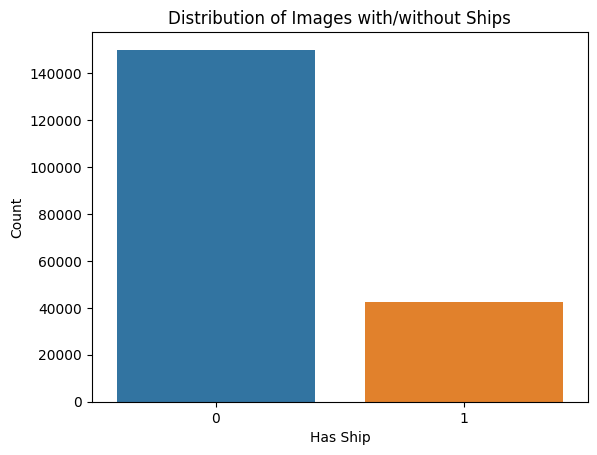

Процент зображень з кораблями: 22.10%


In [6]:
# Створення стовпця для маркування зображень з кораблями
df['has_ship'] = df['EncodedPixels'].notnull().astype(int)

# Групування по зображенню, так як деякі зображення мають декілька кораблів
grouped_df = df.groupby('ImageId')['has_ship'].max().reset_index()

# Гістограмма співвідношення зображень з кораблями та без них
sns.countplot(x='has_ship', data=grouped_df)
plt.xlabel('Has Ship')
plt.ylabel('Count')
plt.title('Distribution of Images with/without Ships')
plt.show()

# Підрахунок проценту зображень з кораблями
percent_with_ship = grouped_df['has_ship'].mean() * 100
print(f"Процент зображень з кораблями: {percent_with_ship:.2f}%")

Спираючись на інформацію вище, можна побачити, що приблизно 78% зображень не має кораблів 